In [ ]:
train_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train"
validation_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation"
test_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/test"
train_cats_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Cat"
train_dogs_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Dog"
validation_cats_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Cat"
validation_dogs_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Dog"
test_cats_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/test/Cat"
test_dogs_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/test/Dog"

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 41, 41, 128)       7385

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)

Found 198 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/All-datasets/cats_and_dogs_small/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
7/7 [==============================] - 30s 4s/step - loss: 0.8598 - accuracy: 0.4899 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 16s 2s/step - loss: 0.7017 - accuracy: 0.4545 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 16s 2s/step - loss: 0.6947 - accuracy: 0.4394 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 16s 2s/step - loss: 0.6937 - accuracy: 0.5051 - val_loss: 0.6928 - val_accuracy: 0.5700
Epoch 5/30
7/7 [==============================] - 16s 2s/step - loss: 0.6924 - accuracy: 0.5606 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/30
7/7 [==============================] - 16s 2s/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 7/30
7/7 [==============================] - 16s 2s/step - loss: 0.6905 - accuracy: 0.5202 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 8/30
7/7 [==================

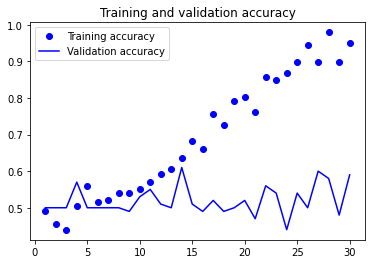

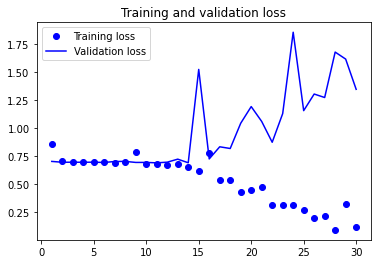

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("/content/drive/MyDrive/All-datasets/cats_and_dogs_small/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 [==============================] - 1s 1s/step - loss: 0.6877 - accuracy: 0.6667
Test accuracy: 0.667
